# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
## ================= EXAMPLE TO WORK OFF OF ===============================================


import json
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Jamestown"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=544d2075b6fb0d83380b01e4dadfe72c&q=Jamestown&units=metric'

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()              ###!!!!! NOT SURE IF THIS IS CORRECT !!!!!######

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]      
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]      
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city  => "try:" above and "except" allow the code to keep running API calls and if a city is not found it will print "City not found. Skipping..."
    except: 
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | batangafo
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | rundu
Processing Record 5 of Set 1 | gobabis
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | khanpur mahar
Processing Record 10 of Set 1 | saguenay
Processing Record 11 of Set 1 | novopskov
Processing Record 12 of Set 1 | franklin
Processing Record 13 of Set 1 | cartagena
Processing Record 14 of Set 1 | phek
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | markaz-e hukumat-e darweshan
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of

In [3]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! REFERENCE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Set the API base URL
url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [4]:
#=============================== MY CODE TO RUN =======================================


# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [4]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! REFERENCE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
#=============================== MY CODE TO RUN =======================================
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,batangafo,7.3008,18.2833,33.68,18,90,0.79,CF,1710266253
1,mar del plata,-38.0023,-57.5575,21.40,93,75,6.71,AR,1710265971
2,blackmans bay,-43.0167,147.3167,10.29,81,59,1.05,AU,1710266255
3,rundu,-17.9333,19.7667,30.00,21,59,1.52,NA,1710266257
4,gobabis,-22.4500,18.9667,26.86,30,77,2.78,NA,1710266258


In [5]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! REFERENCE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [9]:
# Export the City_Data into a csv ===> This allows for the API data that was just pulled and turned into a DF to be stored for easier analysis without calling the API repeadtly.

# Had to add "../" before the provided code to find the "output_data" directory and then spit out data to "cities.csv"
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID") 

In [2]:
# Read saved data 

# Had to add "../" before the provided code to find the "output_data" directory and then pull the saved API data from "cities.csv"
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,batangafo,7.3008,18.2833,33.68,18,90,0.79,CF,1710266253
1,mar del plata,-38.0023,-57.5575,21.40,93,75,6.71,AR,1710265971
2,blackmans bay,-43.0167,147.3167,10.29,81,59,1.05,AU,1710266255
3,rundu,-17.9333,19.7667,30.00,21,59,1.52,NaN,1710266257
4,gobabis,-22.4500,18.9667,26.86,30,77,2.78,NaN,1710266258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

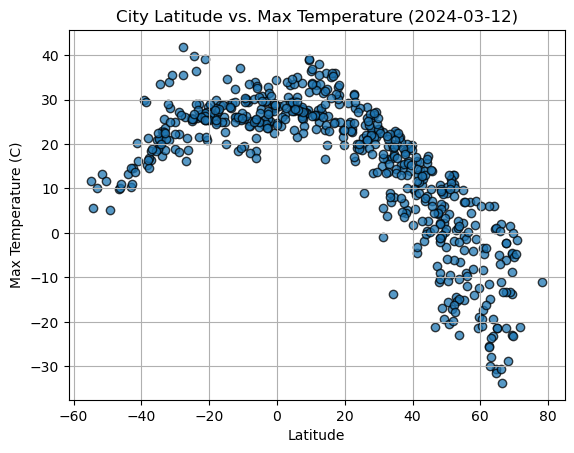

In [3]:
###!!!!!---------------- MAKE SURE ALL THE TITLES/LABELS ARE CORRECT IN THE SCATTER PLOTS DUE TO COPY & PASTING FROM THIS CELL FOR THE OTHERS --------!!!!!!######


# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({formatted_date})')       #DOES IT LOOK LIKE I IMPORTED DATE CORRECTLY???!?!?

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

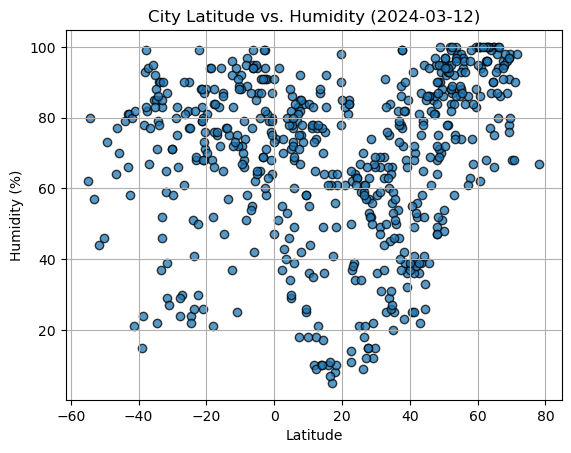

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({formatted_date})')       #DOES IT LOOK LIKE I IMPORTED DATE CORRECTLY???!?!?

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

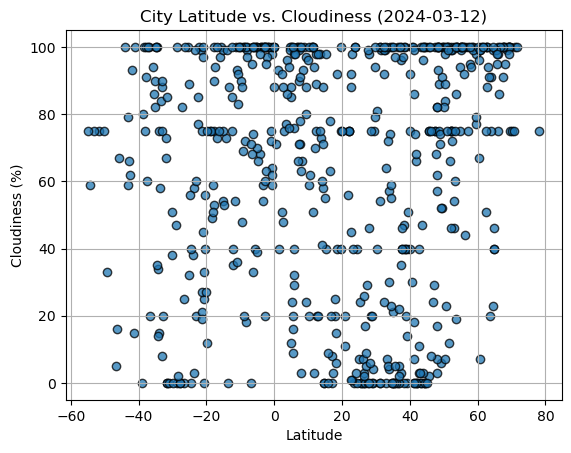

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({formatted_date})')       #DOES IT LOOK LIKE I IMPORTED DATE CORRECTLY???!?!?

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

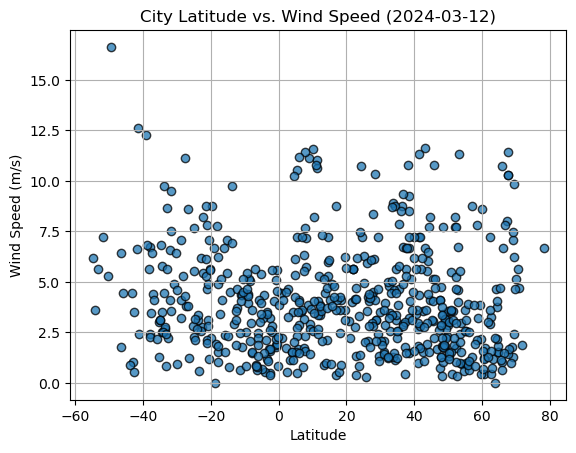

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({formatted_date})')       #DOES IT LOOK LIKE I IMPORTED DATE CORRECTLY???!?!?

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)   ##IS THIS WHAT THIS COMMENT IS ASKING FOR????!!! ===> IS THERE A BETTER WAY TO DO THIS!!!!


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]	

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,batangafo,7.3008,18.2833,33.68,18,90,0.79,CF,1710266253
5,iqaluit,63.7506,-68.5145,-23.15,77,20,0.00,CA,1710266259
7,ilulissat,69.2167,-51.1000,-13.85,91,100,1.26,GL,1710266262
8,khanpur mahar,27.8436,69.4137,22.43,53,46,4.52,PK,1710266264
9,saguenay,48.4168,-71.0657,-1.07,75,100,7.72,CA,1710266013


In [18]:
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]	

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,21.40,93,75,6.71,AR,1710265971
2,blackmans bay,-43.0167,147.3167,10.29,81,59,1.05,AU,1710266255
3,rundu,-17.9333,19.7667,30.00,21,59,1.52,NaN,1710266257
4,gobabis,-22.4500,18.9667,26.86,30,77,2.78,NaN,1710266258
6,port-aux-francais,-49.3500,70.2167,5.27,73,33,16.63,TF,1710266260


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
### FOR THE CODE BELOW ===> DO I NEED THE TIGHTPLOT or SHOULD I JUST SET BOUNDARIES

The r-value is: 0.7444344917824322


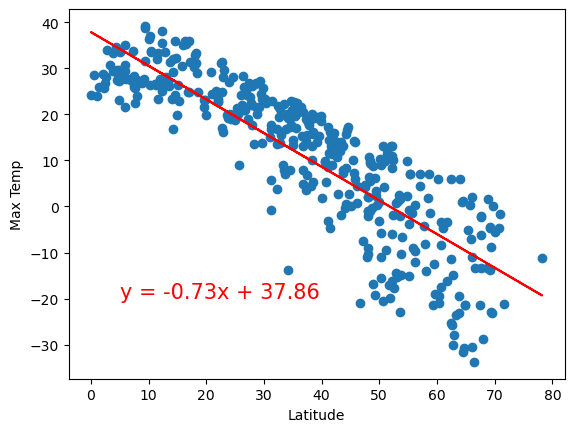

In [34]:
# Linear regression on Northern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']

# Creating Regression Line
regress_values = x_values * slope + intercept                ### IF I DO THIS HERE - WHY IS THERE A REASON FOR THE "Create Linear Regress thing above??????

# Creating a string value of Linear to plot on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot of Latitude vs Max Temp for ONLY Cities in the Northern Hemisphere
plt.scatter(x_values,y_values)

# Plotting regression line on Scatter Plot
plt.plot(x_values,regress_values,"r-")                     # "r-" => creating the Red dashes for each data point but combined with all the points it looks like a line

# Plotting the Equation Line on Scatter Plot for easier analysis
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")    # (5.8,0.8) is saying where we want the text written on the graph

# Labeling x & y axis
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print statement for clarifing the r-value
print(f"The r-value is: {rvalue**2}")                   ### WHY DOES THE EXAMPLE CODE SAY "r-value" and not "r-squared" or "Correlation" when its cleary CORRELATION!!!!!

plt.show()

The r-value is: 0.7161472181434118


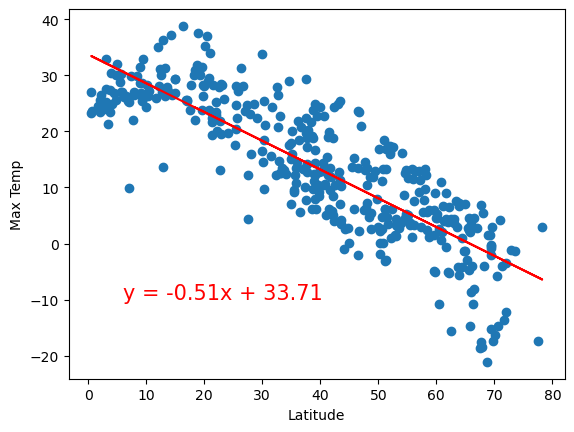

In [15]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! REFERENCE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


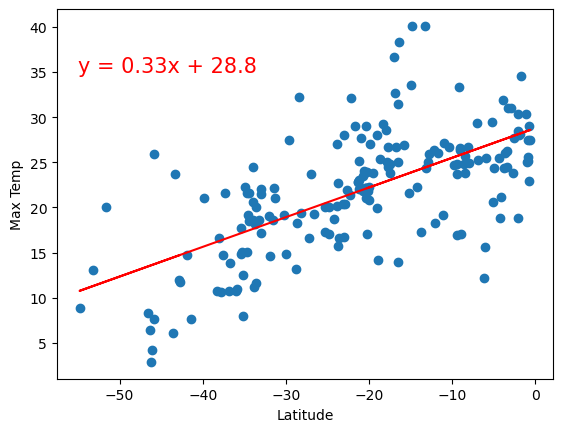

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


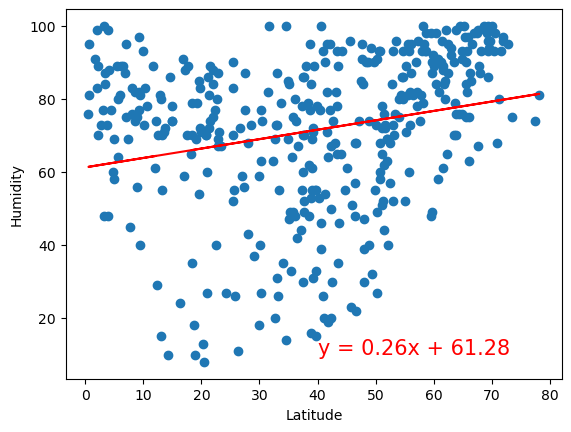

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


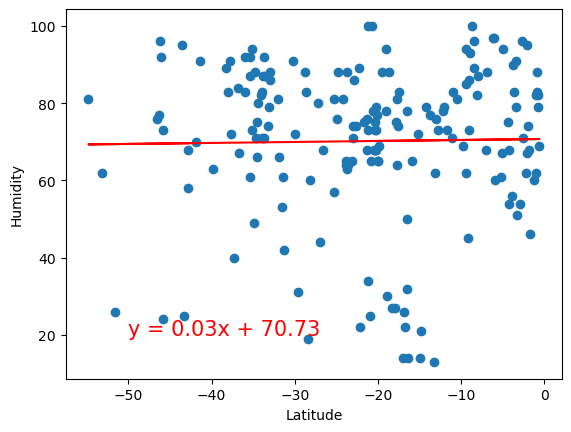

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


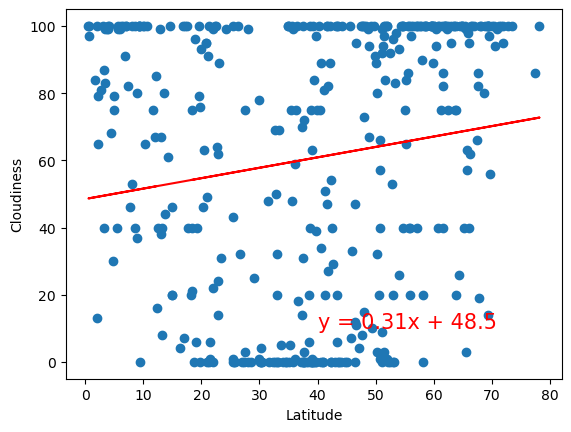

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


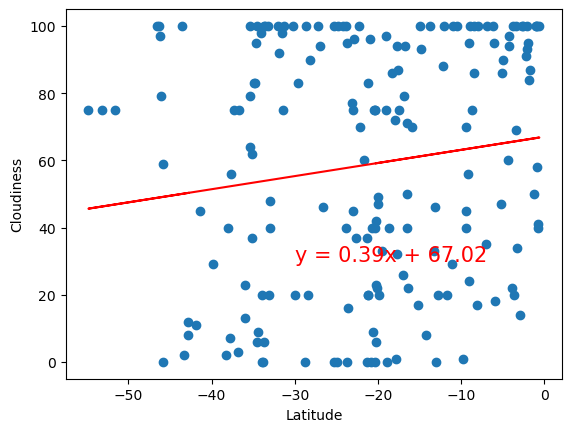

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


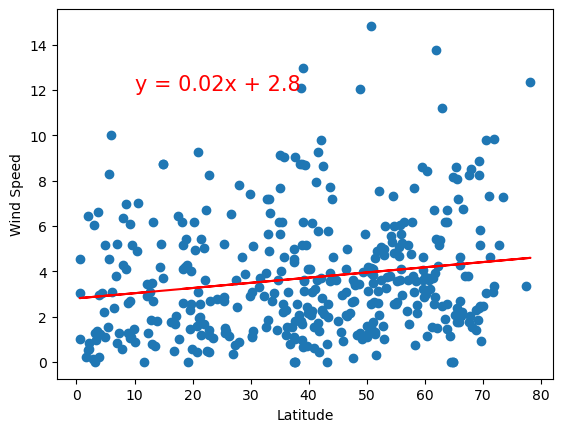

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


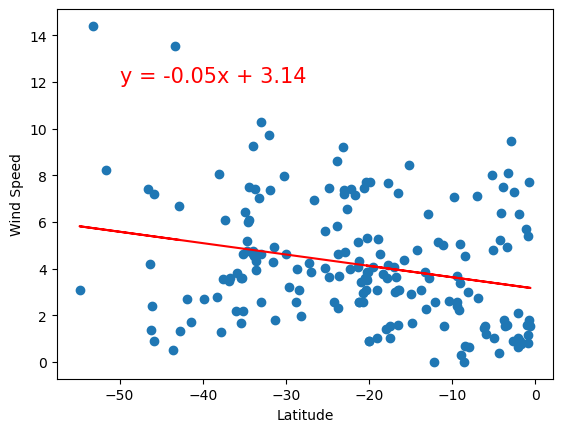

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE